In [2]:
# 필요 데이터 불러오기 및 출력하기
# 전체로 보기 위해서 print 사용
import pandas as pd

co2 = pd.read_csv('../result/CO2.csv')
no = pd.read_csv('../result/NO.csv')
ch4 = pd.read_csv('../result/CH4.csv')
temperature = pd.read_csv('../result/surface-temper.csv')


print(co2)
print(no)
print(ch4)
print(temperature)

       Year           CO2
0    1750.0  9.350528e+06
1    1751.0  9.350528e+06
2    1752.0  9.354192e+06
3    1753.0  9.354192e+06
4    1754.0  9.357856e+06
..      ...           ...
267  2017.0  3.592574e+10
268  2018.0  3.664614e+10
269  2019.0  3.670250e+10
270  2020.0  3.480726e+10
271  2021.0  3.226598e+10

[272 rows x 2 columns]
      Year            NO
0   1990.0  2.368970e+09
1   1991.0  2.356090e+09
2   1992.0  2.348920e+09
3   1993.0  2.332620e+09
4   1994.0  2.424100e+09
5   1995.0  2.479910e+09
6   1996.0  2.493520e+09
7   1997.0  2.480570e+09
8   1998.0  2.510940e+09
9   1999.0  2.498220e+09
10  2000.0  2.490420e+09
11  2001.0  2.512180e+09
12  2002.0  2.570020e+09
13  2003.0  2.604750e+09
14  2004.0  2.687850e+09
15  2005.0  2.701330e+09
16  2006.0  2.733120e+09
17  2007.0  2.802950e+09
18  2008.0  2.775360e+09
19  2009.0  2.769550e+09
20  2010.0  2.845370e+09
21  2011.0  2.914600e+09
22  2012.0  2.937790e+09
23  2013.0  2.918250e+09
24  2014.0  2.963010e+09
25  2015.0  2.

In [3]:
# 평활화는 우리가 사용할 data가 아니니 제외시키기
temperature.drop(columns=['temperature'], inplace=True)
temperature

,Year,lowess
0,1880,-0.10
1,1881,-0.13
2,1882,-0.17
3,1883,-0.20
4,1884,-0.24
...,...,...
137,2017,0.91
138,2018,0.92
139,2019,0.93
140,2020,0.93


In [4]:
# 연도 통일해서 맞추고 index도 맞춰주기
temperature_result = temperature.loc[temperature.Year>=1990, :]
temperature_result.reset_index(drop=True, inplace=True)
print(temperature_result)

co2_result = co2.loc[co2.Year >= 1990, :]
co2_result.reset_index(drop=True, inplace=True)
print(co2_result)

    Year  lowess
0   1990    0.33
1   1991    0.33
2   1992    0.33
3   1993    0.33
4   1994    0.34
5   1995    0.37
6   1996    0.40
7   1997    0.42
8   1998    0.44
9   1999    0.47
10  2000    0.50
11  2001    0.52
12  2002    0.55
13  2003    0.58
14  2004    0.61
15  2005    0.62
16  2006    0.62
17  2007    0.63
18  2008    0.64
19  2009    0.64
20  2010    0.64
21  2011    0.66
22  2012    0.69
23  2013    0.74
24  2014    0.78
25  2015    0.83
26  2016    0.87
27  2017    0.91
28  2018    0.92
29  2019    0.93
30  2020    0.93
31  2021    0.94
      Year           CO2
0   1990.0  2.274957e+10
1   1991.0  2.323810e+10
2   1992.0  2.256962e+10
3   1993.0  2.280350e+10
4   1994.0  2.296458e+10
5   1995.0  2.345394e+10
6   1996.0  2.415496e+10
7   1997.0  2.430055e+10
8   1998.0  2.420627e+10
9   1999.0  2.451896e+10
10  2000.0  2.523421e+10
11  2001.0  2.545105e+10
12  2002.0  2.603919e+10
13  2003.0  2.736672e+10
14  2004.0  2.862753e+10
15  2005.0  2.960278e+10
16  2006.0  3.

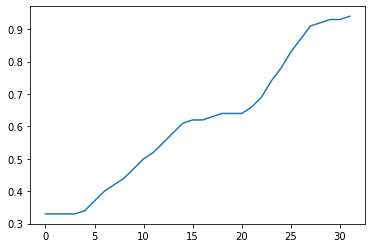

In [11]:
# 종속 변수인 온도 데이터 어떻게 생겼는지 시각화로 확인하기
import matplotlib.pyplot as plt

temperature_result['lowess'].plot()
plt.show()


In [25]:
# co2, ch4, 데이터 연도 기준으로 합치기
data = pd.merge(co2_result, no, on='Year')
data = pd.merge(data, ch4, on='Year')
print(data)
# data.to_csv('airpolution_data.csv', index=False)


    Year          CO2            NO           CH4
0   1990  22749574360  2.368970e+09  6.909030e+09
1   1991  23238102148  2.356090e+09  6.918610e+09
2   1992  22569624280  2.348920e+09  6.895230e+09
3   1993  22803495349  2.332620e+09  6.914180e+09
4   1994  22964583359  2.424100e+09  6.958840e+09
5   1995  23453944453  2.479910e+09  7.032090e+09
6   1996  24154961206  2.493520e+09  7.037110e+09
7   1997  24300550431  2.480570e+09  7.268600e+09
8   1998  24206271270  2.510940e+09  7.159870e+09
9   1999  24518962288  2.498220e+09  7.112040e+09
10  2000  25234207250  2.490420e+09  7.124000e+09
11  2001  25451054498  2.512180e+09  7.062720e+09
12  2002  26039191477  2.570020e+09  7.199600e+09
13  2003  27366723291  2.604750e+09  7.262510e+09
14  2004  28627533033  2.687850e+09  7.505180e+09
15  2005  29602777196  2.701330e+09  7.556280e+09
16  2006  30583530081  2.733120e+09  7.749950e+09
17  2007  31493741589  2.802950e+09  7.729960e+09
18  2008  32069444008  2.775360e+09  7.782220e+09


In [26]:
# 마지막으로 종속 변수인 temperature_result 합치기
data = pd.merge(data, temperature_result, on='Year')
# data.drop(31, inplace=True)
print(data)

    Year          CO2            NO           CH4  temperature
0   1990  22749574360  2.368970e+09  6.909030e+09         0.45
1   1991  23238102148  2.356090e+09  6.918610e+09         0.40
2   1992  22569624280  2.348920e+09  6.895230e+09         0.22
3   1993  22803495349  2.332620e+09  6.914180e+09         0.23
4   1994  22964583359  2.424100e+09  6.958840e+09         0.32
5   1995  23453944453  2.479910e+09  7.032090e+09         0.45
6   1996  24154961206  2.493520e+09  7.037110e+09         0.33
7   1997  24300550431  2.480570e+09  7.268600e+09         0.46
8   1998  24206271270  2.510940e+09  7.159870e+09         0.61
9   1999  24518962288  2.498220e+09  7.112040e+09         0.38
10  2000  25234207250  2.490420e+09  7.124000e+09         0.39
11  2001  25451054498  2.512180e+09  7.062720e+09         0.53
12  2002  26039191477  2.570020e+09  7.199600e+09         0.63
13  2003  27366723291  2.604750e+09  7.262510e+09         0.62
14  2004  28627533033  2.687850e+09  7.505180e+09      

In [28]:
# 독립변수, 종속변수 데이터 넣어주기
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression


x = data[['CH4', 'NO', 'CO2']]
print(data['temperature'])
y = data['temperature'].values
print(x, y)

0     0.45
1     0.40
2     0.22
3     0.23
4     0.32
5     0.45
6     0.33
7     0.46
8     0.61
9     0.38
10    0.39
11    0.53
12    0.63
13    0.62
14    0.53
15    0.67
16    0.63
17    0.66
18    0.54
19    0.65
20    0.72
21    0.61
22    0.65
23    0.67
24    0.74
25    0.89
26    1.01
27    0.92
28    0.85
29    0.98
30    1.02
31    0.84
Name: temperature, dtype: float64
             CH4            NO          CO2
0   6.909030e+09  2.368970e+09  22749574360
1   6.918610e+09  2.356090e+09  23238102148
2   6.895230e+09  2.348920e+09  22569624280
3   6.914180e+09  2.332620e+09  22803495349
4   6.958840e+09  2.424100e+09  22964583359
5   7.032090e+09  2.479910e+09  23453944453
6   7.037110e+09  2.493520e+09  24154961206
7   7.268600e+09  2.480570e+09  24300550431
8   7.159870e+09  2.510940e+09  24206271270
9   7.112040e+09  2.498220e+09  24518962288
10  7.124000e+09  2.490420e+09  25234207250
11  7.062720e+09  2.512180e+09  25451054498
12  7.199600e+09  2.570020e+09  2603919147

In [20]:
# 선형회귀 만들어 놓기
# lr = LinearRegression(fit_intercept = True)
# lr.fit(x, y)

# print('절편 :', lr.intercept_)
# print('회귀 계수 :', lr.coef_)


In [29]:
# 다항 비선형 회귀 사용해서 예측하기
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x_poly)

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
print('intercept:', lin_reg.intercept_)
print('coefficients:', lin_reg.coef_)


X_test = data[['CH4', 'NO', 'CO2']]
x_test_poly = poly_features.fit_transform(X_test)

result = list(lin_reg.predict(x_test_poly))
print(y)
print(result)

[[6.90902979e+09 2.36896997e+09 2.27495744e+10 4.77346926e+19
  1.63672841e+19 1.57177487e+20 5.61201872e+18 5.38930585e+19
  5.17543134e+20]
 [6.91860986e+09 2.35609009e+09 2.32381021e+10 4.78671624e+19
  1.63008681e+19 1.60775363e+20 5.55116050e+18 5.47510621e+19
  5.40009391e+20]
 [6.89522998e+09 2.34891992e+09 2.25696243e+10 4.75441965e+19
  1.61963431e+19 1.55622750e+20 5.51742480e+18 5.30142401e+19
  5.09387940e+20]
 [6.91418018e+09 2.33262012e+09 2.28034953e+10 4.78058875e+19
  1.61281558e+19 1.57667475e+20 5.44111661e+18 5.31918920e+19
  5.19999400e+20]
 [6.95883984e+09 2.42410010e+09 2.29645834e+10 4.84254520e+19
  1.68689243e+19 1.59806858e+20 5.87626128e+18 5.56684488e+19
  5.27372089e+20]
 [7.03208984e+09 2.47990991e+09 2.34539445e+10 4.94502876e+19
  1.74389493e+19 1.64930245e+20 6.14995317e+18 5.81636693e+19
  5.50087510e+20]
 [7.03710986e+09 2.49352002e+09 2.41549612e+10 4.95209152e+19
  1.75471743e+19 1.69981116e+20 6.21764209e+18 6.02308793e+19
  5.83462151e+20]
 [7.26

In [30]:
# MAE를 통해서 ACCURACY가 얼마나 되는 확보하기
mae_sum = 0
for i in range(len(y)):
    mae_sum += (abs(y[i] - result[i])/y[i])
mae = mae_sum / len(y)
print((1 -mae) * 100)

87.59851372045046


In [72]:
# 2050까지의 데이터 들고오기 

co2_2050 = pd.read_csv('../result/2030/co2_2030.csv')
CH4_2050 = pd.read_csv('../result/2030/CH4_2030.csv')
NO_2050 = pd.read_csv('../result/2030/NO_2030.csv')

# co2_2050 = pd.read_csv('../result/2050년도 까지 데이터 증강/co2_2050.csv')
# CH4_2050 = pd.read_csv('../result/2050년도 까지 데이터 증강/CH4_2050.csv')
# NO_2050 = pd.read_csv('../result/2050년도 까지 데이터 증강/NO_2050.csv')

# print(co2_2050, CH4_2050, NO_2050)

# 데이터 통일하기
co2_2050_result = co2_2050.loc[co2_2050.Year >= 1990, :]
co2_2050_result.reset_index(drop=True, inplace=True)
print(co2_2050_result)

data_2050 = pd.merge(co2_2050_result, NO_2050, on='Year')

# co2, ch4, 데이터 연도 기준으로 합치기

data_2050 = pd.merge(data_2050, CH4_2050, on='Year')

# 다항 비선형 회귀 사용해서 예측하기
x_future_data = data_2050[[  'CH4', 'NO', 'CO2']]
print(x_future_data)

       Year           CO2
0    1750.0  9.350528e+06
1    1751.0  9.350528e+06
2    1752.0  9.354192e+06
3    1753.0  9.354192e+06
4    1754.0  9.357856e+06
..      ...           ...
276  2026.0  3.403402e+10
277  2027.0  3.441352e+10
278  2028.0  3.479498e+10
279  2029.0  3.517841e+10
280  2030.0  3.556382e+10

[281 rows x 2 columns]       Year           CH4
0   1990.0  6.909030e+09
1   1991.0  6.918610e+09
2   1992.0  6.895230e+09
3   1993.0  6.914180e+09
4   1994.0  6.958840e+09
5   1995.0  7.032090e+09
6   1996.0  7.037110e+09
7   1997.0  7.268600e+09
8   1998.0  7.159870e+09
9   1999.0  7.112040e+09
10  2000.0  7.124000e+09
11  2001.0  7.062720e+09
12  2002.0  7.199600e+09
13  2003.0  7.262510e+09
14  2004.0  7.505180e+09
15  2005.0  7.556280e+09
16  2006.0  7.749950e+09
17  2007.0  7.729960e+09
18  2008.0  7.782220e+09
19  2009.0  7.812910e+09
20  2010.0  7.909880e+09
21  2011.0  8.050430e+09
22  2012.0  8.141110e+09
23  2013.0  8.109300e+09
24  2014.0  8.266810e+09
25  2015.0  8.

In [73]:
# print(data_2050)
# data_2050.loc[len(data_2050)] = [2031.0, 2.274957e+10, 3.403192e+09, 6.909030e+09]
# print(data_2050)

x_future_data_poly = poly_features.fit_transform(x_future_data)


result_2050 = list(lin_reg.predict(x_future_data_poly))
print(result_2050)

[0.3306690896453288, 0.3001583421111489, 0.3090328141462235, 0.2805033676963715, 0.3807840368872517, 0.4199120196253032, 0.4553938282908403, 0.4766363970160965, 0.45686426824217374, 0.45711648612635525, 0.4458702124036362, 0.4957896048129866, 0.5391714471560816, 0.5766078694298811, 0.6327286107405312, 0.6205519344775352, 0.6170891598578434, 0.7139754120840278, 0.5938695942621903, 0.6176426348922943, 0.6529083586750799, 0.7193749879466962, 0.7232714335069259, 0.634116631178375, 0.7325661353319672, 0.8193235057604111, 0.8889277175750747, 0.9602946869302853, 0.902762118621939, 0.980079733425117, 0.8212045034348021, 0.8334895164929206, 0.8455834327464684, 0.8575052043454603, 0.8692733900995107, 0.8809061554777484, 0.8924212726085612, 0.9038361202799079, 0.9151676839390346, 0.926432555692986, 0.9376469343078666]


In [74]:
data_2050['Temperature'] = result_2050

print(data_2050)

      Year           CO2            NO           CH4  Temperature
0   1990.0  2.274957e+10  2.368970e+09  6.909030e+09     0.330669
1   1991.0  2.323810e+10  2.356090e+09  6.918610e+09     0.300158
2   1992.0  2.256962e+10  2.348920e+09  6.895230e+09     0.309033
3   1993.0  2.280350e+10  2.332620e+09  6.914180e+09     0.280503
4   1994.0  2.296458e+10  2.424100e+09  6.958840e+09     0.380784
5   1995.0  2.345394e+10  2.479910e+09  7.032090e+09     0.419912
6   1996.0  2.415496e+10  2.493520e+09  7.037110e+09     0.455394
7   1997.0  2.430055e+10  2.480570e+09  7.268600e+09     0.476636
8   1998.0  2.420627e+10  2.510940e+09  7.159870e+09     0.456864
9   1999.0  2.451896e+10  2.498220e+09  7.112040e+09     0.457116
10  2000.0  2.523421e+10  2.490420e+09  7.124000e+09     0.445870
11  2001.0  2.545105e+10  2.512180e+09  7.062720e+09     0.495790
12  2002.0  2.603919e+10  2.570020e+09  7.199600e+09     0.539171
13  2003.0  2.736672e+10  2.604750e+09  7.262510e+09     0.576608
14  2004.0

<AxesSubplot:>

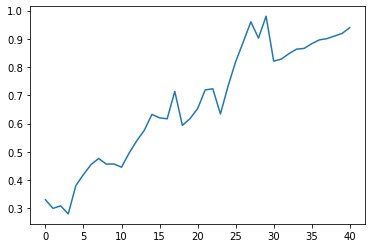

In [75]:
for i in range(31, 41):
    if i % 10 == 1:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.005
    elif i% 10 == 3:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.006
    elif i% 10 == 4:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.003
    elif i% 10 == 5:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.002
    elif i% 10 == 6:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.004
    elif i% 10 == 7:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.003
    elif i% 10 == 8:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.005
    elif i% 10 == 9:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.007
    else:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.002
data_2050.loc[:,'Temperature'].plot()

<AxesSubplot:>

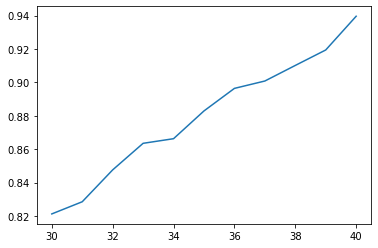

In [76]:
data_2050.loc[30:,'Temperature'].plot()

In [64]:
# import xgboost as xgb

# xgb_model = xgb.XGBRegressor()

In [ ]:
# xgb_model.fit(x, y)
# xgb.plot_importance(xgb_model)

In [ ]:
# result = list(xgb_model.predict(x))

In [ ]:
# result_2030 = list(xgb_model.predict(x_future_data))
# print(result_2030)

In [68]:
# data_2050['Temperature'] = result_2030

# print(data_2050)

      Year           CO2  Unnamed: 0            NO           CH4  Temperature
0   1990.0  2.274957e+10           0  2.368970e+09  6.909030e+09     0.448828
1   1991.0  2.323810e+10           1  2.356090e+09  6.918610e+09     0.400297
2   1992.0  2.256962e+10           2  2.348920e+09  6.895230e+09     0.221265
3   1993.0  2.280350e+10           3  2.332620e+09  6.914180e+09     0.229655
4   1994.0  2.296458e+10           4  2.424100e+09  6.958840e+09     0.321634
..     ...           ...         ...           ...           ...          ...
56  2046.0  4.213724e+10          56  3.848595e+09  1.013828e+10     0.861184
57  2047.0  4.255779e+10          57  3.876433e+09  1.019989e+10     0.861184
58  2048.0  4.298032e+10          58  3.904270e+09  1.026150e+10     0.861184
59  2049.0  4.340483e+10          59  3.932108e+09  1.032311e+10     0.861184
60  2050.0  4.383131e+10          60  3.959946e+09  1.038472e+10     0.861184

[61 rows x 6 columns]
